In [27]:
from __future__ import print_function
import sys
import os
from glob import glob
from time import time

In [28]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
import tables as tb
import numpy as np
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
from invisible_cities.database import load_db
from invisible_cities.core.system_of_units_c import SystemOfUnits
import invisible_cities.sierpe.blr as blr
import invisible_cities.core.mpl_functions as mpl
import invisible_cities.core.wfm_functions as wfm
import invisible_cities.core.tbl_functions as tbl
import invisible_cities.core.peak_functions_c as cpf
import invisible_cities.core.pmaps_functions as pf
import invisible_cities.core.sensor_functions as sf
from invisible_cities.core.core_functions import define_window

In [30]:
import invisible_cities.core.pmaps_functions_c as cpm

In [31]:
t0 = time()

In [32]:
mydf_file = os.environ['IC_DATA']+'/pmaps_JM/pmaps_NEXT_v0_08_09_Kr_ACTIVE_0_0_7bar__10000.root.h5'
#mydf_file = os.environ['IC_DATA']+'/tag_88ccade_pmaps_NEXT_v0_08_09_Kr_ACTIVE_0_0_7bar__10000.root.h5'
print(mydf_file)

/Users/neus/InvCities/data/pmaps_JM/pmaps_NEXT_v0_08_09_Kr_ACTIVE_0_0_7bar__10000.root.h5


In [33]:
mydf = pf.read_pmaps(mydf_file)
#mydf = pf.read_pmaps(os.environ['IC_DATA'],'/pmaps_dst_NEXT_v0_08_06_Kr_ACTIVE_86_0_7bar_MCRD_10000.root.h5')


### myDF is a tuple with 3 indexes  -> 0 = S1, 1 = S2, 2 = S2si

In [34]:
#mydf

In [35]:
S1df = mydf[0]
S2df = mydf[1]
S2Sidf = mydf[2]

print('S1df entries (tbins x events):',len(S1df))
print('S2df entries (tbins x events):',len(S2df))
print('S2Sidf entries:',len(S2Sidf))

S1df entries (tbins x events): 51537
S2df entries (tbins x events): 90642
S2Sidf entries: 45075


#### From above: for S1 the average num of tbins is 5 (~10,000ev)

In [36]:
#mydf[0].peak.values.astype(np.int32)

### Convert Dataframe object (obtained from a pytable readout as a Panda dataframe)

In [37]:
#pf.s12df_to_s12l(mydf[0],evt_max=1)

In [38]:
print('Keys of S1df panda dataframe: {} '.format(S1df.keys()))
print('Keys of S2df panda dataframe: {} '.format(S2df.keys()))
print('Keys of S2Sidf panda dataframe: {} '.format(S2Sidf.keys()))

Keys of S1df panda dataframe: Index(['event', 'evtDaq', 'peak', 'time', 'ene'], dtype='object') 
Keys of S2df panda dataframe: Index(['event', 'evtDaq', 'peak', 'time', 'ene'], dtype='object') 
Keys of S2Sidf panda dataframe: Index(['event', 'evtDaq', 'peak', 'nsipm', 'nsample', 'ene'], dtype='object') 


### Convert an S12df object (an S12 pytable read as a PD dataframe) and return an S12L dictionary (list of dict, first dict)
   

In [39]:
S1 = pf.s12df_to_s12l(S1df)
S2 = pf.s12df_to_s12l(S2df)

In [40]:
#S2

In [41]:
#S2

In [42]:
np.sum(S2[9][0][1])

6632.5119495391846

### Select event #9 and plot S2 peak

number of peaks = 1
S12 number = 0, samples = 10 sum in pes =6632.511949539185


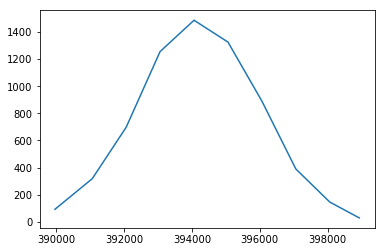

In [43]:
pf.scan_s12(S2[9])

In [44]:
# no funciona...
#pf.index_from_s2(S2[8])

In [45]:
S1[0]

{0: [array([ 100050.,  100075.,  100100.,  100125.,  100150.,  100175.,
          100200.,  100225.]),
  array([ 0.35411209,  0.97938037,  1.76593089,  1.8747046 ,  1.48566234,
          0.71040583,  0.57456046,  0.52694321])]}

#### List S1/S2keys:

In [46]:
# list(S1.keys()) 
#for key in S1:
#    print(key)

In [47]:
#for key in S2:
#    print(key)

In [48]:
evid_S1min = sorted(S1.keys())[0]
evid_S1max = sorted(S1.keys())[-1]
evid_S2min = sorted(S2.keys())[0]
evid_S2max = sorted(S2.keys())[-1]
print('First/last event ID (first item in sorted S1 dictionary): {}/{}'.format(evid_S1min,evid_S1max))
print('First/last event ID (first item in sorted S1 dictionary): {}/{}'.format(evid_S2min,evid_S2max))

First/last event ID (first item in sorted S1 dictionary): 0/9997
First/last event ID (first item in sorted S1 dictionary): 0/9


In [49]:
print('Total number of events in S1 = {}'.format(len(S1)))
print('Total number of events in S2 = {}'.format(len(S2)))

Total number of events in S1 = 6935
Total number of events in S2 = 10


number of peaks = 1
S12 number = 0, samples = 6 sum in pes =5.702682554721832


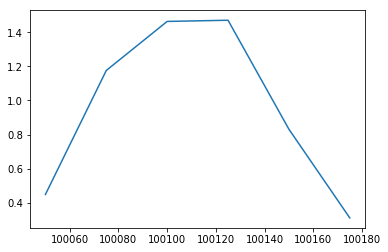

In [50]:
pf.scan_s12(S1[5])

number of peaks = 1
S12 number = 0, samples = 11 sum in pes =6530.112617492676


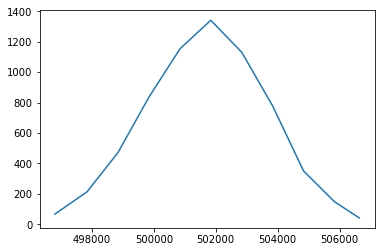

In [51]:
pf.scan_s12(S2[5])

In [52]:
t1 = time()
dt = t1 - t0
print("run in {} s".format(dt))

run in 2.1865789890289307 s
